
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W8/W8P2.ipynb)





In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def download_data():  ### This dude will download the dataset from the directory directly!
  import requests
  url = "https://raw.githubusercontent.com/y-akbal/Tedu_Time_Series/main/W8/combined_csv.csv"
  res = requests.get(url, allow_redirects=True)
  with open('combined_csv.csv','wb') as file:
    file.write(res.content)

download_data()  

### See [the link text](https://www.kaggle.com/datasets/ibrahimkiziloklu/solar-radiation-dataset) for the description of the dataset.

In [3]:
data_ = pd.read_csv("combined_csv.csv")
 #### we will use the windspeed

In [4]:
data_

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Wind Speed,Unnamed: 18
0,2017,1,1,0,0,-0.6,0,0,0,-2.6,0,0,0,86.29,152.92,0.12,1003,1.7,NaN
1,2017,1,1,0,15,-0.6,0,0,0,-2.6,0,0,0,86.29,150.22,0.12,1003,1.7,NaN
2,2017,1,1,0,30,-0.6,0,0,0,-2.6,0,0,0,86.29,147.43,0.12,1003,1.7,NaN
3,2017,1,1,0,45,-0.6,0,0,0,-2.7,0,0,0,85.54,144.60,0.12,1003,1.6,NaN
4,2017,1,1,1,0,-0.7,0,0,0,-2.7,0,0,0,86.17,141.71,0.12,1003,1.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,2019,12,31,22,45,4.0,0,0,0,4.0,0,0,0,100.00,163.63,0.12,999,2.0,NaN
105116,2019,12,31,23,0,3.9,0,0,0,3.9,0,0,0,100.00,162.09,0.12,999,2.0,NaN
105117,2019,12,31,23,15,3.9,0,0,0,3.9,0,0,0,100.00,160.16,0.12,999,2.0,NaN
105118,2019,12,31,23,30,3.9,0,0,0,3.9,0,0,0,100.00,157.93,0.12,999,2.0,NaN


In [5]:
data = data_["Wind Speed"]

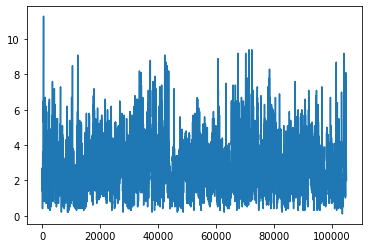

In [6]:
plt.plot(data)   #### you see there is not explicit trend, nor unit root.

In [7]:
import statsmodels

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

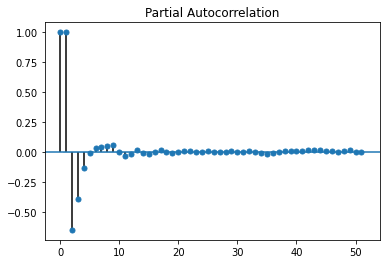

In [9]:
plot_pacf(data); #AR(10) appears to be ok...

In [10]:
from statsmodels.tsa.stattools import arma_order_select_ic
arma_order_select_ic(data[:100], max_ar = 12)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-para

{'bic':              0           1           2
 0    64.400664  -58.229711 -121.518143
 1  -260.016586 -270.242778 -268.964384
 2  -277.010406 -287.089619 -283.936682
 3  -279.439837 -283.179688 -283.100085
 4  -286.184569 -282.360716 -282.905945
 5  -281.823168 -280.177388 -277.058493
 6  -281.836529 -278.039095 -278.296620
 7  -279.375648 -278.440939 -278.130477
 8  -279.124682 -275.547362 -276.549506
 9  -275.913845 -275.750618 -271.145559
 10         NaN -268.765106 -246.857451
 11         NaN -267.305925 -263.841257
 12         NaN -265.375647 -256.371849, 'bic_min_order': (2, 1)}

In [11]:
from statsmodels.tsa.arima.model import  ARIMA
mod = ARIMA(data[:1000], order = (20,0,1))
model = mod.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Wind Speed   No. Observations:                 1000
Model:                ARIMA(20, 0, 1)   Log Likelihood                1258.000
Date:                Thu, 22 Dec 2022   AIC                          -2470.001
Time:                        20:13:41   BIC                          -2357.122
Sample:                             0   HQIC                         -2427.099
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6286      0.854      4.248      0.000       1.955       5.303
ar.L1          1.0280      0.932      1.102      0.270      -0.800       2.856
ar.L2          0.3767      1.182      0.319      0.750      -1.939       2.693
ar.L3         -0.1698      0.083     -2.052      0.040      -0.332      -0.008
ar.L4         -0.0046      0.180     -0.026      0.980      -0.358       0.349
ar.L5         -0.1482      0.061     -2.430      0.015      -0.268      -0.029
ar.L6         -0.1216      0.156     -0.778      0.437      -0.428       0.185
ar.L7          0.0010      0.097      0.011      0.992      -0.189       0.191
ar.L8         -0.1027      0.055     -1.879      0.060      -0.210       0.004
ar.L9          0.0534      0.116      0.462      0.644      -0.173       0.280
ar.L10         0.1189      0.090      1.317      0.188      -0.058       0.296
ar.L11         0.0187      0.107      0.175      0.861      -0.191       0.229
ar.L12        -0.0259      0.056     -0.458      0.647      -0.136       0.085
ar.L13        -0.0515      0.053     -0.972      0.331      -0.155       0.052
ar.L14         0.0517      0.068      0.763      0.445      -0.081       0.185
ar.L15        -0.0181      0.086     -0.211      0.833      -0.186       0.150
ar.L16        -0.0515      0.062     -0.836      0.403      -0.172       0.069
ar.L17         0.0085      0.065      0.131      0.896      -0.118       0.135
ar.L18         0.0161      0.060      0.267      0.789      -0.102       0.134
ar.L19         0.0497      0.048      1.030      0.303      -0.045       0.144
ar.L20        -0.0320      0.037     -0.862      0.389      -0.105       0.041
ma.L1          0.2387      0.935      0.255      0.799      -1.594       2.072
sigma2         0.0047      0.000     37.897      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6324.51
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

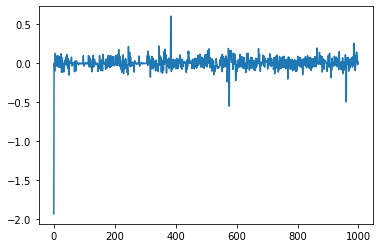

In [13]:
plt.plot(model.resid)

In [14]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(model.resid[1:], model_df = 21, return_df = True, lags = 50)

,lb_stat,lb_pvalue
1,0.003972,NaN
2,0.004180,NaN
3,0.005780,NaN
4,0.006101,NaN
5,0.016911,NaN
6,0.023467,NaN
7,0.038490,NaN
8,0.038598,NaN
9,0.039675,NaN
10,0.041363,NaN


In [15]:
def splitter(data, alpha = 0.8):  ### We split the data into 0.8 and 0.2  train test splitting we do not do validation.
  N = len(data)
  N_ = int(alpha*N)
  data_train = data[:N_]
  data_test = data[N_:]
  return data_train, data_test

In [16]:
data_train, data_test = splitter(data)

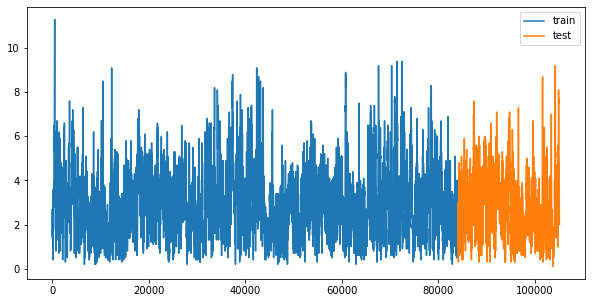

In [17]:
plt.figure(figsize= (10,5))
plt.plot(data_train, label ="train")
plt.plot(data_test, label = "test")
plt.legend()
plt.show()

In [18]:
def sliding_window(data:list, window_size:int = 100):
  data = np.array(data)
  X = []
  y = []
  i = 0
  while True:
    try:
      y.append(data[i+window_size])
      X.append(data[i:i+window_size])
      i += 1
    except Exception:
      print(f"We have reached the end of the list! There are total number of {i} rows in your data")
      break
  return np.array(X), np.array(y)

In [19]:
(X_train, y_train), (X_test, y_test) = sliding_window(data_train), sliding_window(data_test)

We have reached the end of the list! There are total number of 83996 rows in your data
We have reached the end of the list! There are total number of 20924 rows in your data


###Start with KNN

In [20]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_jobs = -1, n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)   #### this gives R2 score, no need to import sklearn's r2score.
y_pred = knn.predict(X_test)

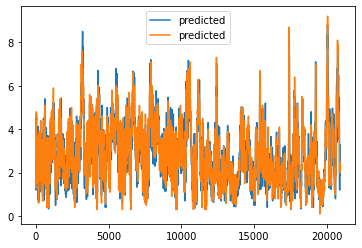

In [21]:
plt.plot(y_pred, label = "predicted")
plt.plot(y_test, label = "test")
plt.legend()
plt.show()

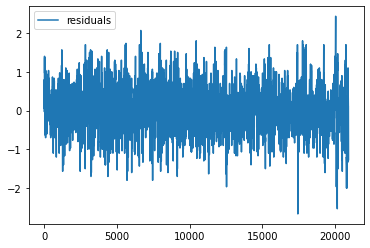

In [22]:
plt.plot(y_test - y_pred, label = "residuals")
plt.legend()
plt.show()

In [23]:
np.mean(y_test - y_pred), np.std(y_test - y_pred, ddof = 1)

(0.022849359587077043, 0.49327451426977426)

###Decision Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
score = dt.score(X_test, y_test)
print(score)   #### this give R2 score, no need to import slearn r2score.
y_pred = dt.predict(X_test)

0.9952174837474221


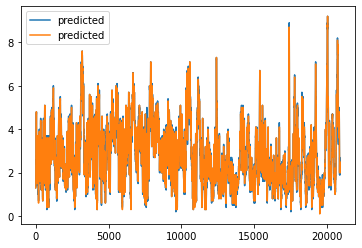

In [25]:
plt.plot(y_pred, label = "predicted")
plt.plot(y_test, label = "test")
plt.legend()
plt.show()

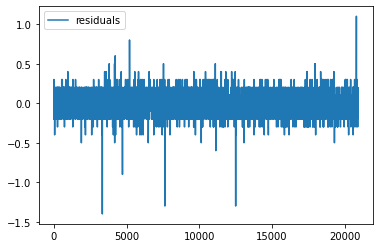

In [26]:
plt.plot(y_test - y_pred, label = "residuals")
plt.legend()
plt.show()

In [27]:
np.mean(y_test - y_pred), np.std(y_test - y_pred, ddof = 1)

(-0.001252150640413003, 0.09931351465749892)

## Time for neural networks

In [28]:
from sklearn.neural_network import MLPRegressor
ml = MLPRegressor(hidden_layer_sizes = (50,25))
ml.fit(X_train, y_train)
score = ml.score(X_test, y_test)
print(score)   #### this gives R2 score, no need to import sklearn r2score.
y_pred = ml.predict(X_test)

0.9929787904698653


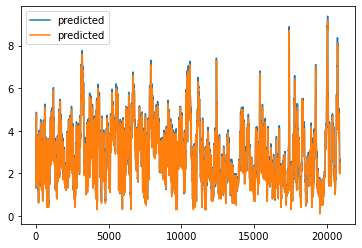

In [29]:
plt.plot(y_pred, label = "predicted")
plt.plot(y_test, label = "predicted")
plt.legend()
plt.show()

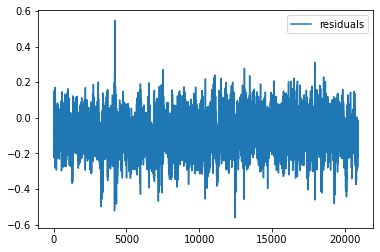

In [30]:
plt.plot(y_test - y_pred, label = "residuals")
plt.legend()
plt.show()

In [31]:
np.mean(y_test - y_pred), np.std(y_test - y_pred, ddof = 1)

(-0.09076504016654058, 0.07901731688718519)

In [32]:
ml.coefs_

[array([[ 0.16331384, -0.07912967,  0.05830524, ..., -0.04247735,
         -0.04249071,  0.11706566],
        [ 0.05405982, -0.08239153, -0.06385301, ...,  0.03483528,
          0.04382966,  0.12637796],
        [-0.02692472,  0.02125725,  0.0604648 , ..., -0.085776  ,
         -0.07852954,  0.01254723],
        ...,
        [-0.10038836,  0.06047197, -0.08968174, ..., -0.16741937,
         -0.01240119, -0.04292753],
        [-0.20443276,  0.09269614, -0.01786469, ..., -0.02157493,
         -0.0475449 ,  0.06011273],
        [-0.29395722, -0.00105778, -0.00170548, ...,  0.08720909,
         -0.01458473,  0.35283879]]),
 array([[-1.11737540e-01, -1.86202901e-01, -4.11623457e-02, ...,
         -7.63993891e-02,  2.07075994e-01,  1.35571864e-01],
        [-6.37230808e-02,  1.98699628e-01, -4.22393528e-04, ...,
          2.09006457e-01,  8.83935349e-02,  2.43932016e-01],
        [-1.96668420e-09, -1.04936522e-01,  8.79536990e-06, ...,
         -2.86821945e-02, -1.21016975e-01, -2.18362164e-

###See what np.roll does to an array np.roll(A, shift)

In [33]:
np.roll([1,2,3,4,5],-1)

array([2, 3, 4, 5, 1])

#Let's do a long term forecast and see what happens?

In [34]:
def function(regressor, data:np.array, length = 10):
  temp = np.copy(data)
  for i in range(length):
    L = regressor.predict(temp.reshape(1,-1))
    temp = np.roll(temp, -1)
    temp[-1] = L
  return temp

In [35]:
function(ml, X_train[-1], 250)  #### length 25 forecast we did.

array([ 121.0202797 ,  124.38428744,  127.85442719,  131.38739718,
        134.98447823,  138.63822508,  142.31909127,  146.00965151,
        149.71616617,  153.42790559,  157.20384766,  161.07545079,
        165.0391035 ,  169.13790855,  173.40523279,  177.83865926,
        182.44991759,  187.22260088,  192.135748  ,  197.19542691,
        202.38555458,  207.68605636,  213.11380088,  218.6746893 ,
        224.36533211,  230.22051555,  236.25507372,  242.48224546,
        248.9225547 ,  255.58290444,  262.44340125,  269.51531154,
        276.78264305,  284.22709248,  291.83742989,  299.59090631,
        307.48140724,  315.52754827,  323.74013461,  332.14167255,
        340.77578566,  349.67641931,  358.84856315,  368.32206918,
        378.10395884,  388.18637433,  398.5679361 ,  409.2252677 ,
        420.15348212,  431.35613137,  442.83251077,  454.58754984,
        466.65198603,  479.04313378,  491.77047265,  504.86972522,
        518.34633564,  532.19642359,  546.44204447,  561.07266

In [36]:
index = data_test.index  ### we get the index set.  of the train set

In [46]:
X_forecast = function(ml, X_train[-1], 20)  #### length 25 forecast we did.

In [47]:
data_forecast = pd.Series(X_forecast)
data_forecast.index = range(index[0]+1, index[0]+len(data_forecast)+1)

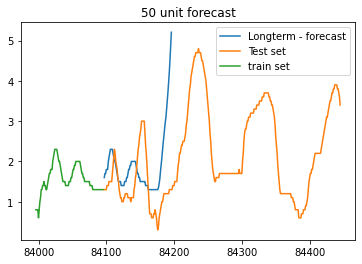

In [48]:
plt.plot(data_forecast, label= "Longterm - forecast")
plt.plot(data_test[:350], label = "Test set")
plt.plot(data_train[-100:], label = "train set")
plt.title("50 unit forecast")
plt.legend()
plt.show()

##You see, long term forecast is not as easy as short term forecast.